# STORM / AFM profiles from correlative Tpr / AFM images

#### date: 26/07/21

----

## Goal

To show the correlation between the basket structure depected in AFM and Tpr localization, the aim is to show superimposed height / intensity profiles.
- both data shown on the same graph (with two different vertical axes for heught and intensity
- for the fluorescence, we may want to represent number of photons instead of intensity
- for now I do not have the correspondance between grey level for AFM images. Will have to convert this later

---

## Workflow

1. import all libraries
2. open image = a 300x300nm crop, with one single NPC roughly centered. This is a stack containing 1) the AFM image, 2) the STORM image. Each image should be 8bit.
3. define parameters (px size, binning for the profiles, grey scale for height...)
4. draw a line that will be used to measure the profile
5. measure height / intensity profiles along the line for both "channels"
6. save data
7. make a graph
8. save graph

---




In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import skimage
from skimage.measure import profile_line


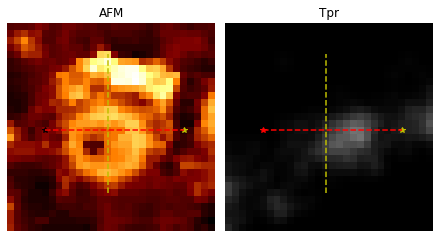

In [3]:
# Load image and define scanning line
url = '/Users/christine/Documents/Data/AFM/STORM-AFM_Tpr/Profiles/qi2_NPC3' # path to the image stack


afm = img.imread(url+'_afm.tif', format='tiff')
fluo = img.imread(url+'_fluo.tif', format='tiff')
strt = [5,14] #start point(coordinates)
stp = [25,14] #end point (coordinates)

x=(strt[0],stp[0])
y=(strt[1],stp[1])


# Show the image (channels height and intensity, side by side) with the line profile on top
fig, (ax0, ax1) = plt.subplots(constrained_layout=True, nrows=1, ncols=2)
ax0.imshow(afm, cmap='afmhot', origin='lower')
ax0.set_title('AFM')
ax0.plot(strt[0], strt[1],'*k')
ax0.plot(stp[0],stp[1], '*y')
ax0.plot(x,y,'--r')
ax0.plot(y,x,'--y')
ax1.imshow(fluo, origin='lower')
ax1.set_title('Tpr')
ax1.plot(strt[0], strt[1],'*r')
ax1.plot(stp[0],stp[1], '*y')
ax1.plot(x,y,'--r')
ax1.plot(y,x,'--y')

ax0.axis('off')
ax1.axis('off')

plt.show()


(21,)
[29. 36. 47. 54. 50. 44. 42. 43. 44. 43. 52. 58. 56. 44. 42. 40. 47. 55.
 64. 76. 59.]


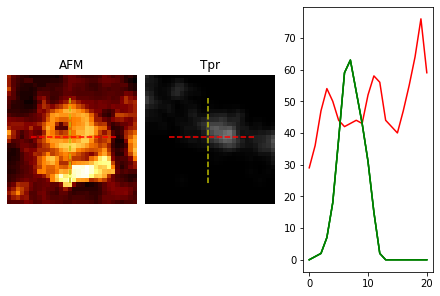

In [4]:
# Measure profile
profile_afm = profile_line(afm, strt, stp, mode='constant')
profile_fluo = profile_line(fluo, strt, stp, mode='constant')

print(profile_afm.shape)
print(profile_afm)


# Plot profiles on the same graph
fig, (ax0, ax1, ax2) = plt.subplots(constrained_layout=True, nrows=1, ncols=3)
ax0.imshow(afm, cmap='afmhot')
ax0.set_title('AFM')
ax0.plot(x,y, '--r')
ax0.plot(y,x, '--y')
ax1.imshow(fluo)
ax1.set_title('Tpr')
ax1.plot(x,y,'--r')
ax1.plot(y,x, '--y')

ax0.axis('off')
ax1.axis('off')

ax2.plot(profile_afm, '-r')
ax2.plot(profile_fluo,'g')

plt.show()


**Nota: for some reason, it should calculate the profile along the red line, but it actually takes the orthogonal (yellow line).**

Or whatever. Actually, I cannot figure it out. 
=> calculate the intensity plots in matlab and make the graphical representation in Python.

**%2"§*$+àù%**



1


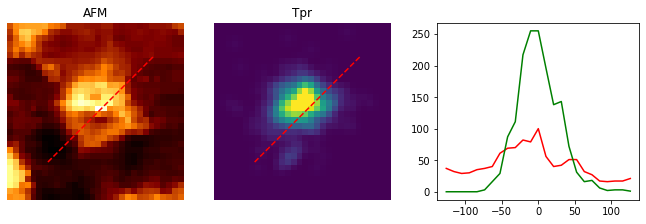

2


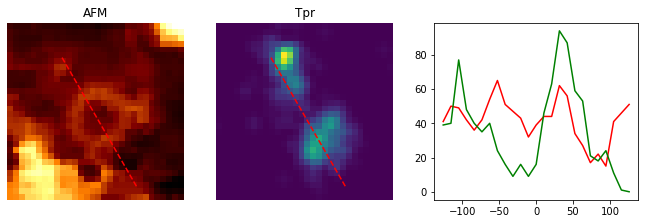

3


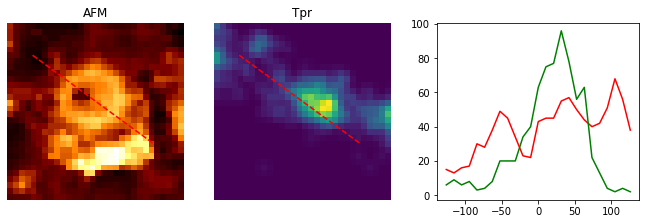

4


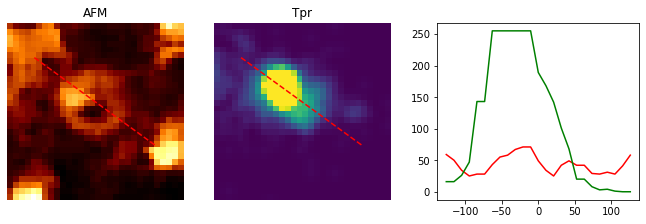

5


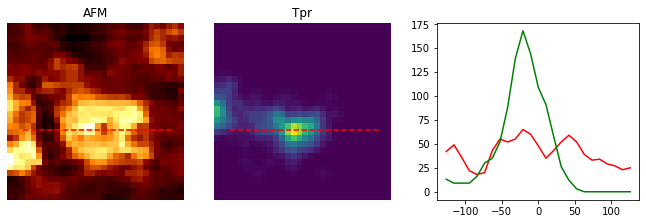

bye


In [31]:
# Load data from Matlab analysis

name='/Users/christine/Documents/Data/AFM/STORM-AFM_Tpr/Profiles/qi2_NPC'

xi=[(24.2,6.4),(8.8,21.4),(3.8,24.2),(4.1,24.5),(2.2,27.4)]  
yi=[(5.3, 23.1),(5.4,27.2),(5,19.9),(5.4,20.2),(17.7,17.7)]
    
NPC_Profile=pd.read_csv('/Users/christine/Documents/Data/AFM/Full NPC Databank/2um/2um_crop2/Mean_NPC_2um.txt')

for i in range(0,5):
    j=i+1
    
    print(j)
    data=pd.read_csv(name+str(j)+'.txt').values
    x = data[0,:]
    profile_afm = data[1,:]
    profile_fluo = data[2,:]
    afm=img.imread(name+str(j)+'_afm.tif', format='tiff')
    fluo=img.imread(name+str(j)+'_fluo.tif', format='tiff')
    
    fig,(ax0,ax1,ax2)=plt.subplots(constrained_layout=True, nrows=1, ncols=3, figsize=(9,3))
    ax0.imshow(afm, cmap='afmhot')
    ax0.set_title('AFM')
    ax0.plot(xi[i],yi[i], '--r')
    
    ax1.imshow(fluo)
    ax1.set_title('Tpr')
    ax1.plot(xi[i],yi[i],'--r')
    

    ax0.axis('off')
    ax1.axis('off')

    ax2.plot(x,profile_afm, '-r')
    ax2.plot(x,profile_fluo,'g')
    plt.show()
    

print('bye')



px = 10 # px size in nm
#z = # grey level conversion to nm for AFM image
#p = # nb of photons conversion for fluorescence intensity

# Convert all units (x in nm, profile values in either height or number of photons)
